# INTRODUCTION

It's no surprise to say that companies suffer when their customers churn. In this particular case, a telecommunication company suffers financially -- in the form of revenue -- when their customers churn. Due to that, they are looking to retend their existing customers by providing discount coupons. However, they are concerned if they will profit from the discount prgram, and therefore, are only willing to give discount coupons to customers that are of value.

## OBJECTIVE
To sum it up, the tasks in this project entails as such:
- predict customers who are likely to churn
- determining which customers are profitable for retention

In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


# DATA SET

From the given description of this data set, we already know some information about the columns in our data set as such:
- Churn indicates the customers who left within the last month, which will be our target variable.
- Services that customers have signed up for, which are phone service, multiple lines, internet, online security, online backup, device protection, tech support, TV streaming, and movie streaming
- Customer account information, which are tenure, contract type, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers, which are gender, if they are a senior citizen, and if they have partners and dependents

## OVERVIEW

Let us start by taking a quick glance at our dataset!

In [2]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We can see that there are 21 columns and 7043 rows in total. Upon inspecting the first few rows, we see that there are a few numerical data, which should be senior citizen, tenure, monthly charges, and total charges. However, we can see that the total charges column was listed as an object instead of a numerical data type, so let us find out what that looks like and fix any issue we find.

## DATA CLEANING

In [4]:
df['TotalCharges'].sort_values()

936           
3826          
4380          
753           
5218          
         ...  
6646    997.75
5598     998.1
3686    999.45
3353     999.8
2845     999.9
Name: TotalCharges, Length: 7043, dtype: object

When we sort our values, we get to see the top and bottom edges of our data when printed out, and we can see that there are empty values at the start. In order to convert the column's data type to a numerical data type, we would need to convert these empty values to a value that is operatable.

In [5]:
df['TotalCharges'] = df.TotalCharges.str.strip()
df = df.replace('', np.nan)
df['TotalCharges'].sort_values()

105      100.2
4459    100.25
1723    100.35
2124     100.4
2208     100.8
         ...  
3826       NaN
4380       NaN
5218       NaN
6670       NaN
6754       NaN
Name: TotalCharges, Length: 7043, dtype: object

We have replaced the empty values with numpy's null values (NaN which stands for Not a Number), and now we will decide what to do with these null values that may prevent us from getting accurate analysis. We may want to inspect why there are empty values in the total charges column in the first place.

In [6]:
df[df.TotalCharges.isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [7]:
df.TotalCharges.isna().sum()

11

There are a total of 11 rows without total charges. With the data listed above, we can see that there is a similarity in all these 11 customers that lead to them having no total charges, which is that their tenure is 0. We can draw the conclusion that customers with 0 tenure has paid no charges at all (0 tenure = 0 total charges).

Compared to the 7043 rows that we have in this dataset, 11 rows are insignificant in size, and there is no actual value that we can replace the null values with. As such, we will just drop these 11 rows.

In [8]:
df = df.dropna()
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Another column whose data we may want to fix is the SeniorCitizen column. As of now, the unique values from this column is respectively "1" which indicates that the customer is a senior citizen and "0" which indicates that the customer is a non-senior citizen. Instead of a number, we will change this into something more easily decipherable, as simple as "Yes" and "No" values.

In [10]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({1:'Yes', 0:'No'})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


We've already fixed the data type for all the numerical columns. Now we also need to convert the categorical columns into the correct data type 'category' -- this allows faster data processing. After that, we will double-check for null values and duplicated rows in the whole dataset.

In [11]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_cols = [col for col in df.columns if col not in num_cols]

In [12]:
df[cat_cols] = df[cat_cols].astype('category')
df.dtypes

customerID          category
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(7032, 21)

In [15]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


After cleaning our data and making sure they have the correct data types, we now have a total of 21 columns and 7032 rows, from which we can start making analyis.

# EXPLORATORY DATA ANALYSIS

Since we are trying to determine the factors that are causing customers to churn, we will be aggregating the data based on customers that churned and on customers that did not in this analysis. To ease the process of analysis, visualizations will be performed on the data.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style = 'ticks', font_scale = 1.25, context = 'notebook', rc = custom_params)
blue, red = '#1A74FE', '#FF2626'

First and foremost, let us compare the number of churned customers and existing customers.

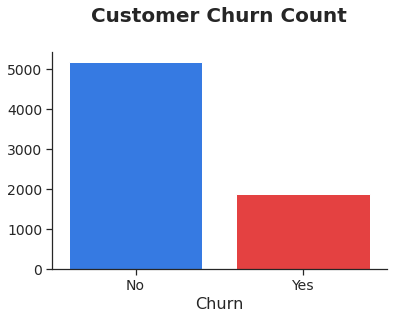

In [17]:
ax = sns.countplot(x=df['Churn'], palette=[blue, red])
ax.set_title('Customer Churn Count', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('Churn', fontsize=16)
ax.set_ylabel('', fontsize=18)
ax.tick_params(labelsize=14)

From the graph above, we can see there is a 5:2 ratio when comparing the number of existing customers to the customers who churned.

## BASED ON DEMOGRAPHICS

Based on their demographics, what sort of customers are churning?

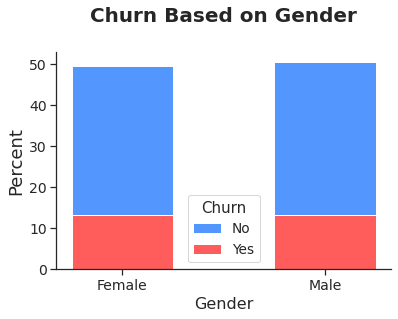

In [18]:
ax = sns.histplot(data=df, x='gender', hue='Churn', shrink=0.5, multiple='stack', palette=[blue, red], stat='percent')
ax.set_title('Churn Based on Gender', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('Gender', fontsize=16)
ax.set_ylabel('Percent', fontsize=18)
ax.tick_params(labelsize=14)

It seems that there is an equal number of female customers and male customers as well an equal ratio of existing customers and churned customers based on gender. 

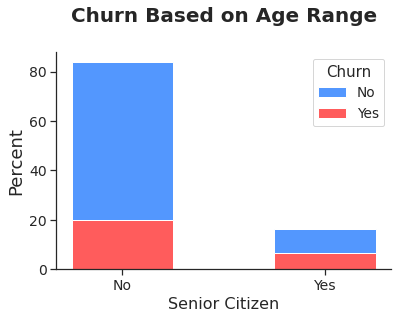

In [19]:
ax = sns.histplot(data=df, x='SeniorCitizen', hue='Churn', shrink=0.5, multiple='stack', palette=[blue, red], stat='percent')
ax.set_title('Churn Based on Age Range', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('Senior Citizen', fontsize=16)
ax.set_ylabel('Percent', fontsize=18)
ax.tick_params(labelsize=14)

When comparing based on age range, we can see that there are more non-senior citizen customers subscribed in general. 60% of the non-senior citizens did not churn, while 20 % of them churned. Meanwhile, the rest 20% are senior citizens, where there are more who did not churn than there are who churned.

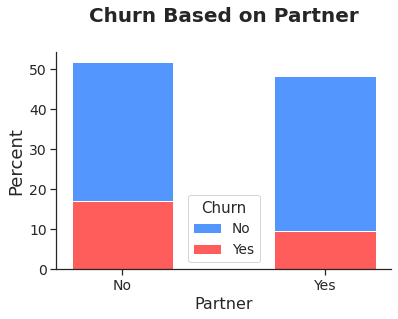

In [20]:
ax = sns.histplot(data=df, x='Partner', hue='Churn', shrink=0.5, multiple='stack', palette=[blue, red], stat='percent')
ax.set_title('Churn Based on Partner', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('Partner', fontsize=16)
ax.set_ylabel('Percent', fontsize=18)
ax.tick_params(labelsize=14)

Based on having a partner, there is a little bit more customers who did not have partners than there are who have partners. There is an almost equal distribution of those who churned and those who did not. 

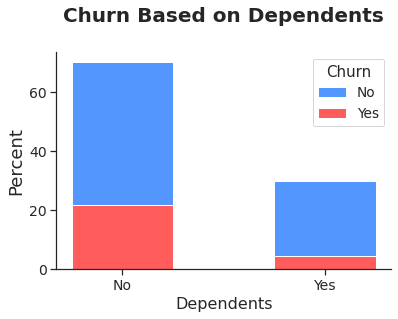

In [21]:
ax = sns.histplot(data=df, x='Dependents', hue='Churn', shrink=0.5, multiple='stack', palette=[blue, red], stat='percent')
ax.set_title('Churn Based on Dependents', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('Dependents', fontsize=16)
ax.set_ylabel('Percent', fontsize=18)
ax.tick_params(labelsize=14)

As for having dependents, there is a ratio of around 7:3 of customer who do not have dependents than those who do. 50 percent are customers who do not have dependents and did not churn, while 20 percent are customers who do not have dependents and churned. The rest 30 percent are split between the customer who have dependents, where around 25 percent did not churn and 5 percent churned.

## BASED ON SERVICES

Based on the services they signed up for, what sort of customers are churning?

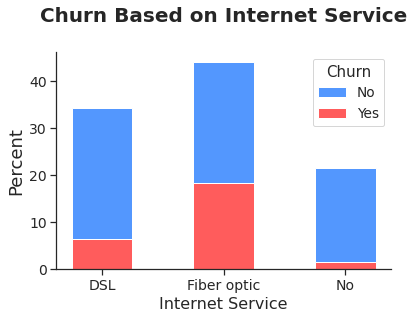

In [22]:
ax = sns.histplot(data=df, x='InternetService', hue='Churn', shrink=0.5, multiple='stack', palette=[blue, red], stat='percent')
ax.set_title('Churn Based on Internet Service', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('Internet Service', fontsize=16)
ax.set_ylabel('Percent', fontsize=18)
ax.tick_params(labelsize=14)

In general, most of the customers opted for the fiber optic internet service. We can also see that there are more customers with fiber optic internet service who churned when compared to the other internet services. Below the fiber optic, there is the DSL internet service coming in second in terms of the number of customer who subscribed for it, and customer with no internet service coming in last.

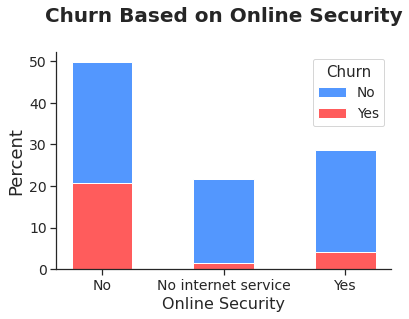

In [23]:
ax = sns.histplot(data=df, x='OnlineSecurity', hue='Churn', shrink=0.5, multiple='stack', palette=[blue, red], stat='percent')
ax.set_title('Churn Based on Online Security', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('Online Security', fontsize=16)
ax.set_ylabel('Percent', fontsize=18)
ax.tick_params(labelsize=14)

Based on their online security, we can easily see that there is high percentage of customer who churned without having the online security in their subscription. Overall, there are a lot of customers who did not have online security in their subscription (50 percent).

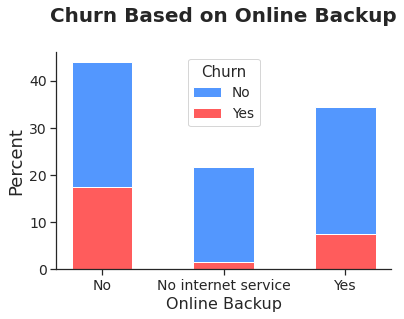

In [24]:
ax = sns.histplot(data=df, x='OnlineBackup', hue='Churn', shrink=0.5, multiple='stack', palette=[blue, red], stat='percent')
ax.set_title('Churn Based on Online Backup', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('Online Backup', fontsize=16)
ax.set_ylabel('Percent', fontsize=18)
ax.tick_params(labelsize=14)

Based on online backup, most of the customers did not have online backup, and we can also see that there is a high percentage of customer who churned without having online backup in their subscription.

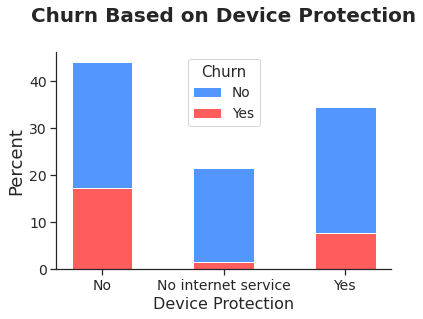

In [25]:
ax = sns.histplot(data=df, x='DeviceProtection', hue='Churn', shrink=0.5, multiple='stack', palette=[blue, red], stat='percent')
ax.set_title('Churn Based on Device Protection', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('Device Protection', fontsize=16)
ax.set_ylabel('Percent', fontsize=18)
ax.tick_params(labelsize=14)

Based on device protection, most of the customers did not opt to have device protection as part of their services. A lot of customers who did not have device protection also churned.

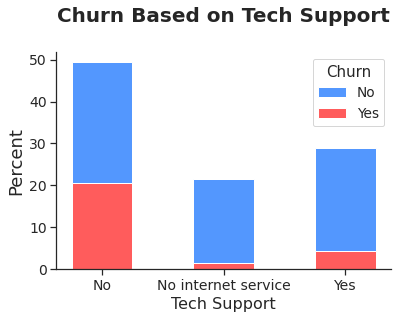

In [26]:
ax = sns.histplot(data=df, x='TechSupport', hue='Churn', shrink=0.5, multiple='stack', palette=[blue, red], stat='percent')
ax.set_title('Churn Based on Tech Support', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('Tech Support', fontsize=16)
ax.set_ylabel('Percent', fontsize=18)
ax.tick_params(labelsize=14)

50% of customer did not sign up to have tech support, and overall, there is a high percentage of customers who churned without having tech support.

## BASED ON ACCOUNT INFORMATION

Typically, what do churned customers account information look like?

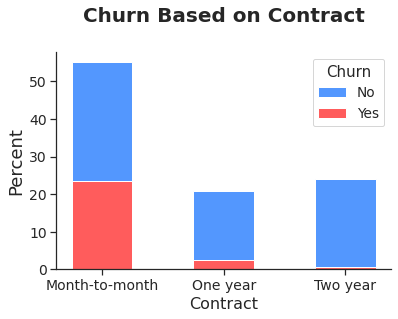

In [27]:
ax = sns.histplot(data=df, x='Contract', hue='Churn', shrink=0.5, multiple='stack', palette=[blue, red], stat='percent')
ax.set_title('Churn Based on Contract', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('Contract', fontsize=16)
ax.set_ylabel('Percent', fontsize=18)
ax.tick_params(labelsize=14)

In general, more customers were on the month-to-month contract (50 percent) than there are with one-year and two-year contract. A lot of customers who churned were also on the month-to-month contract.

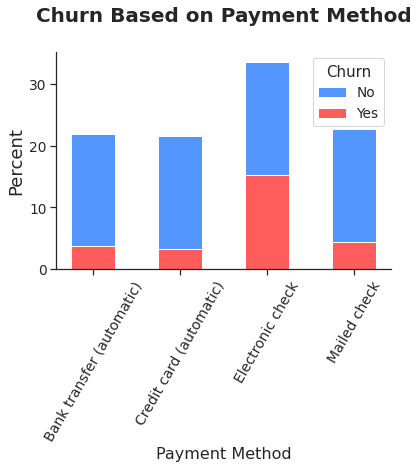

In [28]:
ax = sns.histplot(data=df, x='PaymentMethod', hue='Churn', shrink=0.5, multiple='stack', palette=[blue, red], stat='percent')
ax.set_title('Churn Based on Payment Method', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('Payment Method', fontsize=16)
ax.set_ylabel('Percent', fontsize=18)
# ax.set(ylim=(0, 2500))
ax.tick_params(labelsize=14, axis='x', rotation=60)

Based on payment method, we can see that most of the customers were paying with electronic check. Customers paying with electronic check are also seen to be the most who churned when compared to the other payment methods.

#### MONTHLY CHARGES

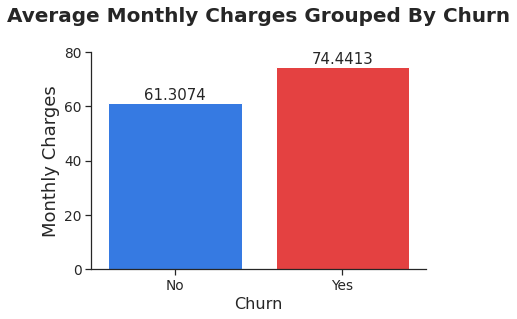

In [29]:
ax = sns.barplot(data=df, x='Churn', y='MonthlyCharges', palette=[blue, red], ci = None)
ax.set_title('Average Monthly Charges Grouped By Churn', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('Churn', fontsize=16)
ax.set_ylabel('Monthly Charges', fontsize=18)
ax.set(ylim=(0, 80))
for c in ax.containers:
    ax.bar_label(c)
ax.margins(y = 0.2)

Grouped by whether the customers churned or not, we can see that there is a difference in their average monthly charges. Customer who did not churn were paying less monthly charges overall with a difference of around 13 in their monthly averages.

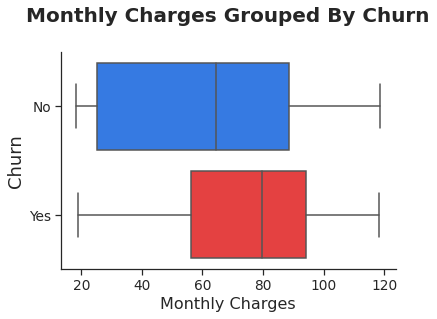

In [30]:
ax = sns.boxplot(data = df, x = 'MonthlyCharges', y = 'Churn', palette=[blue, red])
ax.set_title('Monthly Charges Grouped By Churn', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('Monthly Charges', fontsize=16)
ax.set_ylabel('Churn', fontsize=18)
plt.show()

From the boxplot above, which compares the distribution of the monthly charges of customers who churned and customers who did not, there are some information that we can obtain. First of all, we can see that there are no outliers, as all of the data points are still within the minimum and maximum range of the boxplot. Comparing their medians, we can see that the median of the monthly charge of customers who churned (80) is higher than the median of the customers who did not churn (65). For the customers who did not churn, the 25th percentile stretches pretty low to around 25, and the 75th percentile reaches just below 90. As for the customers who churned, the interquartile range is a lot shorter, with the 25th percentile stretching only just below 60, and the 75th percentile reaching around 95.

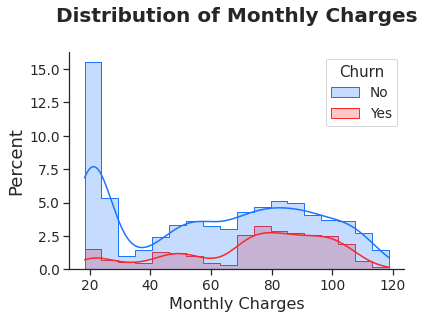

In [31]:
ax = sns.histplot(data = df, x = 'MonthlyCharges', hue = 'Churn', kde = True, element = 'step', palette=[blue, red], stat='percent')
ax.set_title('Distribution of Monthly Charges', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('Monthly Charges', fontsize=16)
ax.set_ylabel('Percent', fontsize=18)
plt.show()

To clearly see the distribution of the monthly charges, a histogram with a kernel density estimator line is used. We can see that a lot of customers who did not churn are on the cheapest monthly charge around 20, with how the bin is high and the kde curves up at 20, which caused the 25th percentile of the interquartile range to stretch very low. However, we do not see this same pattern for the customers who churned, with how there are of customers paying around 20 monthly charge.

#### TOTAL CHARGES

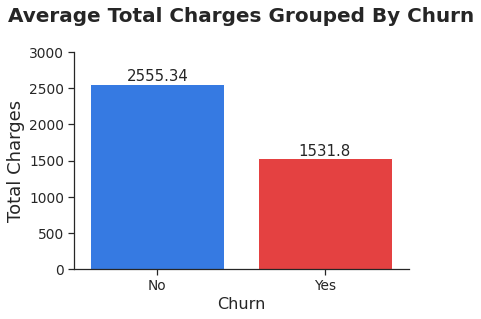

In [32]:
ax = sns.barplot(data=df, x='Churn', y='TotalCharges', palette=[blue, red], ci = None)
ax.set_title('Average Total Charges Grouped By Churn', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('Churn', fontsize=16)
ax.set_ylabel('Total Charges', fontsize=18)
ax.set(ylim=(0, 3000))
for c in ax.containers:
    ax.bar_label(c)
ax.margins(y = 0.2)

Grouped by their churn status, we can see that the average total charge of customers who did not churn are higher than those who churned, with a difference of around 1000.

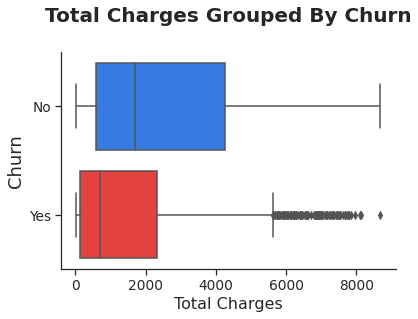

In [33]:
ax = sns.boxplot(data = df, x = 'TotalCharges', y = 'Churn', palette=[blue, red])
ax.set_title('Total Charges Grouped By Churn', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('Total Charges', fontsize=16)
ax.set_ylabel('Churn', fontsize=18)
plt.show()

From the boxplot of the total charges, we can first see that there are a lot outliers on the higher end of the total charges of customer who churned, as the maximum range only reaches just below 6000. Another observation is that the interquartile range of the total charges of customers who did not churn are a lot more stretched out, its 75th percentile reached just above 4000, whereas the 75th percentile of the customers who churned only reaches just a bit above 2000. We also see that the median from the customers who did not churn is just below 2000, while the median from the customers who churned does not even reach 1000.

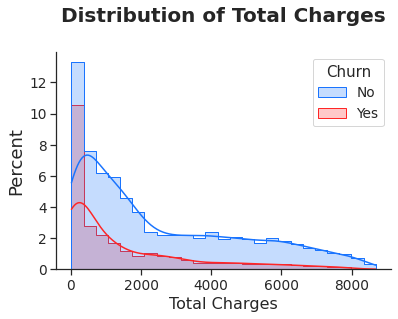

In [34]:
ax = sns.histplot(data = df, x = 'TotalCharges', hue = 'Churn', kde = True, element = 'step', palette=[blue, red], stat='percent')
ax.set_title('Distribution of Total Charges', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('Total Charges', fontsize=16)
ax.set_ylabel('Percent', fontsize=18)
plt.show()

The distributions the total charges of the customers who churned and who did not are quite similar at first glance, however, we can see that there is a high spike on the lower end of the distribution from the customers who churned, which explains the low interquartile range on its boxplot.

#### TENURE

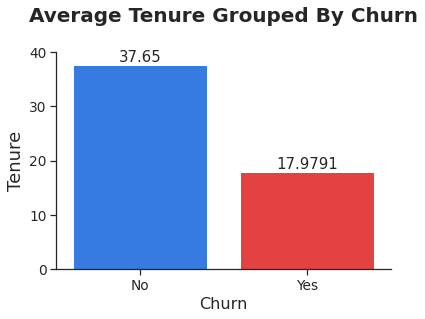

In [35]:
ax = sns.barplot(data=df, x='Churn', y='tenure', palette=[blue, red], ci = None)
ax.set_title('Average Tenure Grouped By Churn', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('Churn', fontsize=16)
ax.set_ylabel('Tenure', fontsize=18)
ax.set(ylim=(0, 40))
for c in ax.containers:
    ax.bar_label(c)
ax.margins(y = 0.2)

Comparing their tenure, it seems that the customers who did not churn have a higher average tenure, with a difference of 20 in their average tenure.

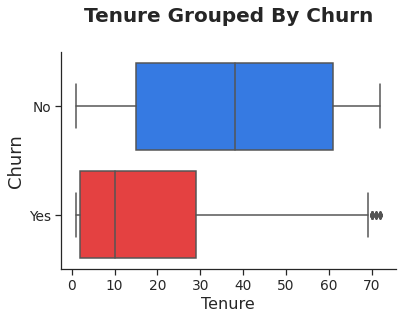

In [36]:
ax = sns.boxplot(data = df, x = 'tenure', y = 'Churn', palette=[blue, red])
ax.set_title('Tenure Grouped By Churn', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('Tenure', fontsize=16)
ax.set_ylabel('Churn', fontsize=18)
plt.show()

In this boxplot of customer's tenure based on their churn status, we can see that the tenure of customers who did not churn are generally higher than the customers who churned. Also, we can see that tenure of more than 70 for customers who churned are considered as outliers. The median of the tenure for customers who did not churn is around 40, while the median of the tenure for the customers who churned is at 10.

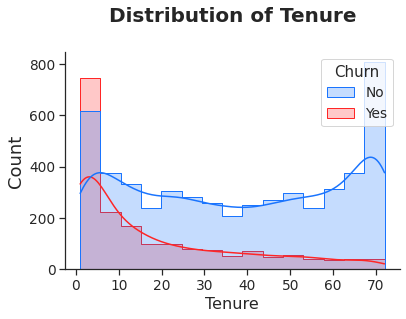

In [37]:
ax = sns.histplot(data = df, x = 'tenure', hue = 'Churn', kde = True, element = 'step', palette=[blue, red])
ax.set_title('Distribution of Tenure', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('Tenure', fontsize=16)
ax.set_ylabel('Count', fontsize=18)
plt.show()

In the histogram above, we can see that the distribution of the tenure of customers who did not churn takes the shape of the letter "U", meaning that the distribution spikes high at the lower and higher end of the distribution. As for the distribution of the tenure of customers who churned, it has a high count at the very low end of the distribution and decreases exponentially as it reaches the end of the distribution.

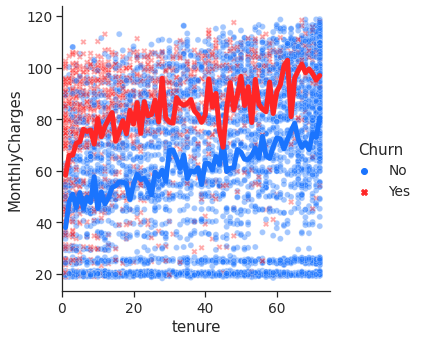

In [38]:
ax = sns.relplot(kind = 'scatter', data = df, x = 'tenure', y = 'MonthlyCharges', hue = 'Churn', style = 'Churn', palette=[blue, red], alpha = 0.4)
ax.map_dataframe(sns.lineplot, x = 'tenure', y = 'MonthlyCharges', hue = 'Churn', palette=[blue, red], ci = None, linewidth = 5)
ax.set(xlim=(0, 75))
plt.show()

In the graph above, we plotted all the data for each monthly charge in relation to tenure with the color blue for the customers who did not churn and the color red for customers who churned. For both the line plots, it looks like the line plot for the customers who churned had just a higher intercept, with similar gradient.

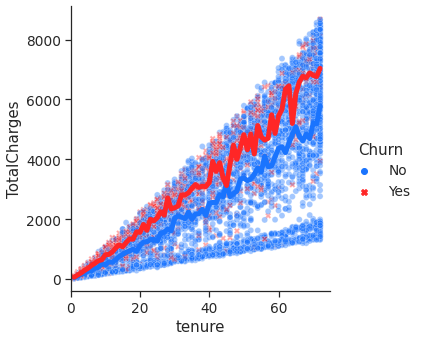

In [39]:
ax = sns.relplot(kind = 'scatter', data = df, x = 'tenure', y = 'TotalCharges', hue = 'Churn', style = 'Churn', palette=[blue, red], alpha = 0.4)
ax.map_dataframe(sns.lineplot, x = 'tenure', y = 'TotalCharges', hue = 'Churn', palette=[blue, red], ci = None, linewidth = 5)
ax.set(xlim=(0, 75))
plt.show()

Meanwhile, when plotting total charges in relation to tenure, we can see that the gradient for the line plot of the customers who churned is a little bit steeper that the line plot of the customers who did not churn.

# DATA PREPROCESSING

Previously, we were cleaning the data set so that the EDA would run smoothly. In the data preprocessing section, our goal is to make sure that the data can be understood by the machine learning model. Machine learning models can only process numerical data. Meanwhile, in our data set, we have a mix categorical data and numerical data, and we need to make sure that they are treated differently. Therefore, we need to transform the data into the correct form using their own methods.

## ENCODING

For columns with categorical data, we need to encode them in order to transform the data into numerical form. In this project, we will be using the label encoder package. Even though the data is not ordinal, I chose to use the label encoder and not the one-hot encoder because the dimension of the dataset is already horizontally quite wide, and one-hot encoder would expand the existing categorical columns even more, thus taking more memory when in the future processes.

In [40]:
data = df.drop('customerID', axis=1)

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_cols = [col for col in data.columns if col not in num_cols]

First off, we drop the customer ID column because by common sense it should be of no value to the machine learning model. Then we define the columns that are categorical and numericals. Since the label encoder is utilized to process categorical data, only the columns with categorical data go through this process.

In [41]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

for col in data.columns:
    if (data[col].dtype.name == 'category'):
        data[col] = enc.fit_transform(data[col])
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


With the observation above, we see that the data of the categorical columns have been changed into integers, which the machine learning models are able to read.

In [42]:
# data[cat_cols] = data[cat_cols].astype('category')
# data.dtypes

## SCALING

Once the categorical columns have been taken care of, the numerical columns also need to be treated. The numerical columns in this data set are tenure, monthly charges, and total charges, and all of their values have a different range. Most machine learning models need to compute the Euclidean distance between two points, however, if the magnitude of the numerical data are different, the features with higher magnitude carry more weight in the calculations. This is where we need to scale our data. By scaling our data, all the features are brought to the same level of magnitude.

In the project, we will use the MinMaxScaler where our numerical data will be transformed to a value between 0 and 1. The goal in mind when deciding this scaling method is to have only absolute values in our dataset, which the MinMaxScaler can achieve.

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(data[num_cols])

MinMaxScaler()

In [44]:
data[num_cols] = scaler.transform(data[num_cols])
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.000000,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.001275,0
1,1,0,0,0,0.464789,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.215867,0
2,1,0,0,0,0.014085,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.010310,1
3,1,0,0,0,0.619718,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.210241,0
4,0,0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.323944,1,2,0,2,0,2,2,2,2,1,1,3,0.662189,0.227521,0
7039,0,0,1,1,1.000000,1,2,1,0,2,2,0,2,2,1,1,1,0.845274,0.847461,0
7040,0,0,1,1,0.140845,0,1,0,2,0,0,0,0,0,0,1,2,0.112935,0.037809,0
7041,1,1,1,0,0.042254,1,2,1,0,0,0,0,0,0,0,1,3,0.558706,0.033210,1


With the observation above, we now see that our numerical data have been transformed to a floating point value ranging between 0 and 1.

## IMBALANCED DATA

In our EDA, one of the graphs that was visualized was the comparison between the number of customers who churned and customers who did not churn. Below, we bring up the graph again to emphasize that there is quite a big difference in the numbers, namely that there are significantly less customers who churned. Since the column 'Churn' is the target variable in this project, this will cause an issue with our machine learning results -- the model will be biased towards the class which has more data because there is not enough data to distinguish the other class. To fix this issue we will use over-sampling technique called SMOTE to generate more data for the class with less data.

SMOTE -- Synthetic Minority Over-sampling Technique -- is a technique that generates more data for the minority class based on nearest neighbors judged by Euclidean Distance between data points, which aims to balance the data in the target variable. For this particular case, SMOTE-NC is used because there are both Nominal and Continuous features in this data set, which is what the -NC stands for.

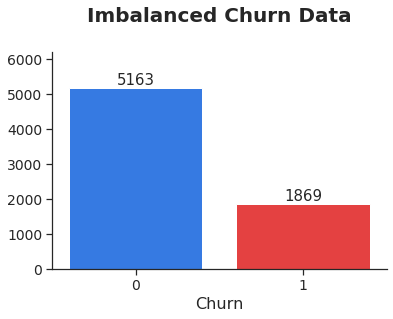

In [45]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style = 'ticks', font_scale = 1.25, context = 'notebook', rc = custom_params)
blue, red = '#1A74FE', '#FF2626'

ax = sns.countplot(x=data['Churn'], palette=[blue, red])
ax.set_title('Imbalanced Churn Data', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('Churn', fontsize=16)
ax.set_ylabel('', fontsize=18)
ax.tick_params(labelsize=14)
for c in ax.containers:
    ax.bar_label(c)
ax.margins(y = 0.2)

In [46]:
from imblearn.over_sampling import SMOTENC

In [47]:
cat_feat = []
for col in cat_cols:
    if col != 'Churn':
        cat_feat.append(data.columns.get_loc(col))
cat_feat

[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [48]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

smote_nc = SMOTENC(categorical_features=cat_feat, random_state=1, k_neighbors=5, sampling_strategy='minority')
X_res, y_res = smote_nc.fit_resample(X, y)

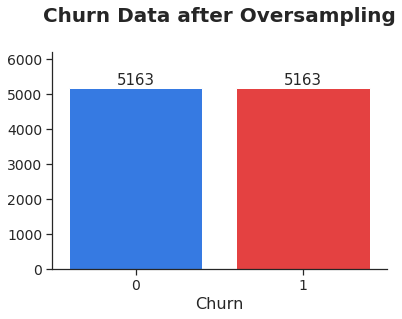

In [49]:
ax = sns.countplot(x=y_res, palette=[blue, red])
ax.set_title('Churn Data after Oversampling', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('Churn', fontsize=16)
ax.set_ylabel('', fontsize=18)
ax.tick_params(labelsize=14)
for c in ax.containers:
    ax.bar_label(c)
ax.margins(y = 0.2)

In [50]:
data_res = pd.DataFrame(X_res)
data_res['Churn'] = y_res
data_res.columns = data.columns
data_res

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,0.000000,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.115423,0.001275,0
1,1.0,0.0,0.0,0.0,0.464789,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,0.385075,0.215867,0
2,1.0,0.0,0.0,0.0,0.014085,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.354229,0.010310,1
3,1.0,0.0,0.0,0.0,0.619718,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.239303,0.210241,0
4,0.0,0.0,0.0,0.0,0.014085,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.521891,0.015330,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10321,0.0,0.0,0.0,0.0,0.358112,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,2.0,0.688003,0.262075,1
10322,1.0,0.0,0.0,0.0,0.975106,1.0,2.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.887614,0.858873,1
10323,0.0,0.0,0.0,0.0,0.004515,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,0.719071,0.011888,1
10324,0.0,0.0,0.0,0.0,0.010980,1.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,3.0,0.593017,0.014441,1


In [51]:
data_res.dtypes

gender              float64
SeniorCitizen       float64
Partner             float64
Dependents          float64
tenure              float64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

After over-sampling the data in our target variable, we now see that there is an equal number of data for customers who churned and who did not. Another observation is that all of our features are now in numerical form, which means that they are ready to be processed by machine learning models.

# FEATURE SELECTION

Now that we have readied the data for the machine learning models, we will have to choose the features that will positively impact our predictions. This process is called feature selection. It aims to reduce the dimension of the data that will be processed by machine learning model and in turn decreases computational cost. Not only that, it could also help improve the performance of the model. Below are some considerations of which features will be used for the machine learning model.

## SPLITTING DATA

Before we proceed to select our features, it is advised that our data is split into training and testing set first. This is done in order to prevent information leakage from the test set. We will not use the test set in any stage of the model building including feature selection.

In [52]:
from sklearn.model_selection import train_test_split
X, y = data_res.drop('Churn', axis=1), data_res['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101, stratify = y)

## FEATURE CORRELATION

The first consideration we look at to remove our features is to see if any of our features correlate with each other. When features are correlated, this indicates that there is a linear dependency. When two features have high correlation, we can drop one of them.

<AxesSubplot:>

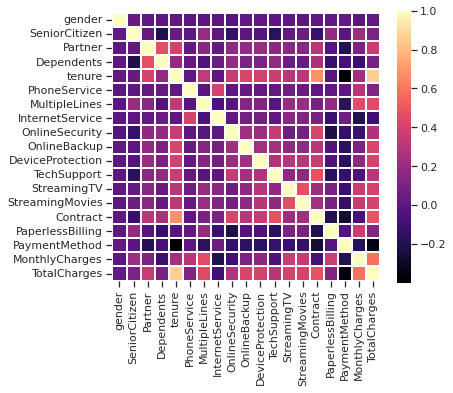

In [53]:
sns.set_theme(context = 'notebook', palette = 'bright', style = 'ticks')
plt.figure(figsize=(6, 5))
data_test = pd.DataFrame(X_train)
sns.heatmap(data_test.corr(), linewidth=0.1, square=True, cmap='magma')

From the correlation heatmap that we generated above, we see all of the features and their relationship with one another. To the right is a color bar indicating the correlation score value. In this particular heatmap, when the features are positively correlated, the value will be towards 1.0 and the color will be lighter. Vice versa, when the features are negatively correlated, the value will be towards negative -1.0 and the color will be darker. We can easily spot that tenure is highly correlated to total charges, which makes complete sense since total charges is essentially monthly charges multiplied by tenure.

## CHI-SQUARE TEST

The Chi-Square test is a statistical hypothesis test to assess the relationship of two categorical data. The null hypothesis here is that there is no relationship between the two categorical variables, while the alternate hypothesis is otherwise. In this case, we will use the Chi-Square test to see if there is a relationship between the target variable and the categorical features. Once the Chi-Square test produces the scores, a graph will be used to display which features have good scores.

In [54]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [55]:
cat_cols = [col for col in cat_cols if col != 'Churn']

In [56]:
select = SelectKBest(score_func=chi2, k=4)

fitted = select.fit(X_train[cat_cols], y_train)
np.set_printoptions(precision=3)
print(fitted.scores_)

[2.548e-02 1.020e+02 1.835e+02 3.458e+02 1.849e-01 9.423e+00 1.179e+01
 1.278e+03 4.081e+02 3.600e+02 1.192e+03 1.108e+01 1.671e+01 2.282e+03
 1.746e+02 1.463e+02]


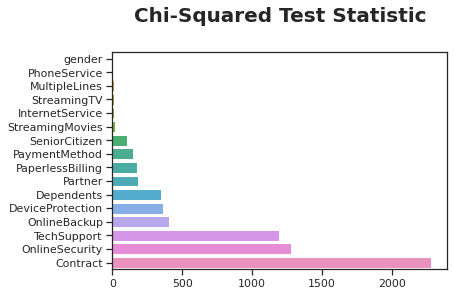

In [57]:
scores = pd.DataFrame(cat_cols)
scores['statistic'] = fitted.scores_
scores = scores.sort_values('statistic')

ax = sns.barplot(data=scores, x='statistic', y=0)
ax.set_title('Chi-Squared Test Statistic', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('')
ax.set_ylabel('')
plt.show()

## RANDOM FOREST

Random forest is a machine learning algorithm that can be used to determine the importance of a variable on the tree decision by evaluating how pure a split at a node -- if all the data belongs to a single class. If a node is split evenly, then it is impure, and when training a tree, a computation is made to see if a feature decreases the impurity to see how important a feature is. To measure the impurity, we use the Gini impurity, which measures the mean decrease in node impurity.

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

rfr = RandomForestRegressor(n_jobs = -1, max_depth = 5)
rfr.fit(X_train, y_train)
importance = rfr.feature_importances_
feature_dict = {}
for i, v in enumerate(importance):
    feature_dict[i] = v

# for k in feature_dict:
#     print('Feature: %s, Score: %.5f' % (k, feature_dict[k]))

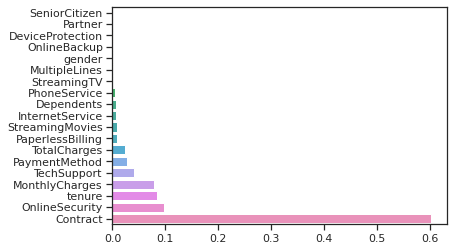

In [59]:
ix = rfr.feature_importances_.argsort()
ax = sns.barplot(y=[X_train.columns.values[x] for x in ix], x=[importance[x] for x in ix])

## BORUTA

Boruta is a random based forest method that iteratively remove features, leaving only the important features at the end. TThe uniqueness of the boruta method is that it creates shuffled copies of all features (shadow features) before training a random forest classifier and measuring the feature importance. With each iteration, the algorithm validates the importance of a feature by comparing the scores of its iterations, constantly removing features that are not important. Below, features that are ranked number 1 are the most important features. Features ranked number 2 are optional to use, but the rest of the features can be left out.

In [60]:
from boruta import BorutaPy

brt = BorutaPy(rfr, n_estimators = 'auto', random_state = 101)
brt.fit(np.array(X_train), np.array(y_train))
brt_ranking = brt.ranking_

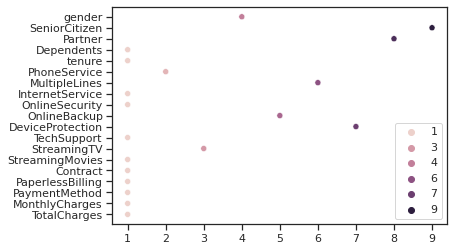

In [61]:
ax = sns.scatterplot(y=[col for col in X_train.columns.values], x=brt_ranking, hue=brt_ranking)

In [62]:
selected_features = {}
for i, col in enumerate(X_train.columns):
    if brt_ranking[i] <= 2:
        selected_features[col] = brt_ranking[i]
selected_features

{'Dependents': 1,
 'tenure': 1,
 'PhoneService': 2,
 'InternetService': 1,
 'OnlineSecurity': 1,
 'TechSupport': 1,
 'StreamingMovies': 1,
 'Contract': 1,
 'PaperlessBilling': 1,
 'PaymentMethod': 1,
 'MonthlyCharges': 1,
 'TotalCharges': 1}

# MACHINE LEARNING MODEL

After deciding the features to be selected, we move on to training the data on a machine learning algorithm from which make our predictions. As a preliminary test, we will be using different classification models with their default parameters to compare how well each model works with the data set that we have. These classification models are Logistic Regression, Naive Bayes, Stochastic Gradient Descent, K-Nearest Neighbors, Decision Tree, Random Forest, and Support Vector Machine. The models will take turns to fit the data in the loop and an accuracy score will be the output.

In [63]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [64]:
features = [k for k in selected_features.keys()]

In [65]:
X_train1, y_train1 = X_train.loc[:,features], y_train
X_test1, y_test1 = X_test.loc[:,features], y_test
print(X_train1.shape, y_train1.shape)

(7744, 12) (7744,)


## MODEL SELECTION

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = [LogisticRegression(),
          GaussianNB(),
          SGDClassifier(),
          KNeighborsClassifier(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          SVC()]

In [67]:
for i, model in enumerate(models):
    model.fit(X_train1, y_train1)
    print(models[i], ':', model.score(X_test1, y_test1))
    y_pred = model.predict(X_test1)
#     print(classification_report(y_test1, y_pred))

LogisticRegression() : 0.7835011618900077
GaussianNB() : 0.774593338497289
SGDClassifier() : 0.7769171185127808
KNeighborsClassifier() : 0.7955073586367157
DecisionTreeClassifier() : 0.7532920216886135
RandomForestClassifier() : 0.8175832687838884
SVC() : 0.7827265685515105


## HYPERPARAMETER TUNING

From the list of accuracy scores produced by the different models, we can see that the Random Forest Classifier is most superior in terms of its accuracy score. For that reason only, we will continue with the Random Forest Classifier and tune its parameters for the sake of improvement. The process of hyperparameter tuning aims to find the optimal parameter values for the model. To achieve this, we will use the GridSearchCV method, which exhaustively attempts all possible combinations that we provide it with. Not only that, this method also comes with cross-validation which estimates how well the model performs on a new data by switching test sets a number of times.

In [68]:
n_estimators = [500, 600, 700] # Number of trees in random forest
max_features = ['auto'] # Number of features to consider at every split
max_depth = [12, 14, 15] # Maximum number of levels in tree
min_samples_split = [2, 3] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2] # Minimum number of samples required at each leaf node
random_state = [101]

param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'random_state': random_state}

In [69]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()

grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid, 
                       cv=5, verbose=1, n_jobs=-1)
grid_rf.fit(X_train1, y_train1)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  4.9min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [12, 14, 15], 'max_features': ['auto'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [500, 600, 700],
                         'random_state': [101]},
             verbose=1)

In [70]:
print('Best Parameters:\n', grid_rf.best_params_)
print('Best Score:\n', grid_rf.best_score_)

Best Parameters:
 {'max_depth': 14, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 500, 'random_state': 101}
Best Score:
 0.8208942837172604


In [71]:
y_pred = grid_rf.predict(X_test1)

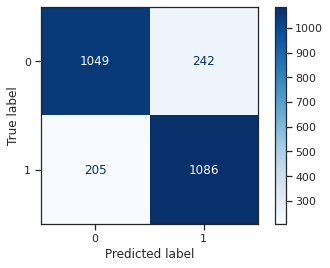

In [72]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test1, y_pred))
disp.plot(cmap='Blues')
plt.show()

After running an exhaustive search (plus cross-validation) with GridSearchCV, we found the best parameters and the best score obtained by the best parameters. Once that is done, the model that has been tuned then makes its prediction on a new test set that the model has never seen before. To evaluate its prediction, a confusion matrix is displayed, where there are four different numbers obtained from the prediction done on the new test set -- at the top left are True Positives, at the top right are False Positives, at the bottom left are False Negatives, and at the bottom right are True Negatives.

In [73]:
print(classification_report(y_test1, y_pred))
# print(confusion_matrix(y_test1, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1291
           1       0.82      0.84      0.83      1291

    accuracy                           0.83      2582
   macro avg       0.83      0.83      0.83      2582
weighted avg       0.83      0.83      0.83      2582



Using different combinations from the values in the confusion matrix, many different model evaluation scores can be calculated, which are as such:
- Accuracy = (True Positive + True Negative) / (True Positive + True Negative + False Positive + False Negative) -- number of correct predictions
- Precision = True Positive / (True Positive / False Positive) -- ability not to label negatives as positives
- Recall = True Positive / (True Positive / False Negative) -- ability to find all positive samples
- F1-score = 2 * (Precision * Recall) / (Precision + Recall) -- harmonic mean of precision and recall
- Support is the number of occurences in each class in y_test

# DISCOUNT VALUE

In the beginning of the project, we mentioned that the telecommunication company is looking to create a discount program that will still be profitable for the company. Using the machine learning model that we created in the previous section, we are now already able to predict which customers are likely to churn. We first need to graph a line of best fit where the x axis is tenure in years and the y axis is the annual charge of customers. To assess if a customer who is predicted to churn is worth retending by providing a discount, the particular customer's tenure in years and annual charge will be plotted on the same graph, and the distance between that customer's data point and the line of best fit will be calculated, resulting in the maximum amount of discount that can be provided for that particular customer, that is, if the data point is above the line of best fit. Otherwise, that means the customer is of no value, and retending the customer would not be profitable in that case.

In [74]:
df['yearly'] = 12 * df['TotalCharges'] / df['tenure']
df['tenureinyears'] = df['tenure'] / 12
coef = np.polyfit(df['tenureinyears'], df['yearly'], 1)
coef
# plt.plot(df['tenure'], coef[0]*df['tenure'] + coef[1])

array([ 43.6  , 659.795])

In [75]:
df['distance'] = df['yearly'] - (coef[0]*df['tenureinyears'] + coef[1])
df['distance'].sort_values()

932    -703.926370
2338   -700.918036
1277   -700.351370
6614   -697.855500
3122   -696.233322
           ...    
3159    672.305412
2280    673.963858
2265    681.355614
440     693.984871
171     789.738723
Name: distance, Length: 7032, dtype: float64

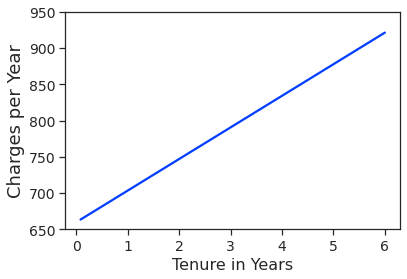

In [76]:
ax = sns.regplot(data = df, x = 'tenureinyears', y = 'yearly', scatter = False, ci = None)
ax.set_title('', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('Tenure in Years', fontsize=16)
ax.set_ylabel('Charges per Year', fontsize=18)
ax.tick_params(labelsize=14)
plt.xticks(range(0,7,1))
plt.yticks(range(650,1000,50))
plt.show()

We managed to create the line of best fit that we intended to get. Now let us grab a couple of customers' data from our data set as an example where both have already churned. We will take one customer who is profitable for retending and one customer who is not.

In [77]:
df[(df['Churn'] == 'Yes') & (df['distance'] > 0) & (df['tenureinyears'] < 3)].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,yearly,tenureinyears,distance
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,909.90,0.166667,242.838723
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1230.75,0.666667,541.888858
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1305.45,2.333333,543.922641
29,8773-HHUOZ,Female,No,No,Yes,17,Yes,No,DSL,No,...,Yes,Month-to-month,Yes,Mailed check,64.70,1093.10,Yes,771.60,1.416667,50.039060
36,6047-YHPVI,Male,No,No,No,5,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,69.70,316.90,Yes,760.56,0.416667,82.598790


In [78]:
df[(df['Churn'] == 'Yes') & (df['distance'] < 0) & (df['tenureinyears'] > 5)].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,yearly,tenureinyears,distance
430,9063-ZGTUY,Female,No,Yes,Yes,61,Yes,No,No,No internet service,...,No internet service,Month-to-month,Yes,Mailed check,19.40,1182.55,Yes,232.632787,5.083333,-648.793830
4149,6559-ILWKJ,Male,No,Yes,No,71,No,No phone service,DSL,No,...,Yes,Two year,No,Electronic check,49.35,3515.25,Yes,594.126761,5.916667,-323.632965
4642,5458-CQJTA,Male,No,Yes,Yes,65,Yes,No,DSL,Yes,...,Yes,Two year,Yes,Bank transfer (automatic),74.80,4820.15,Yes,889.873846,5.416667,-6.086014
5441,3512-IZIKN,Female,No,Yes,No,70,Yes,Yes,DSL,Yes,...,No,Two year,No,Credit card (automatic),65.30,4759.75,Yes,815.957143,5.833333,-98.169272
5841,7136-RVDTZ,Male,Yes,No,No,70,No,No phone service,DSL,No,...,Yes,One year,Yes,Electronic check,45.25,3264.45,Yes,559.620000,5.833333,-354.506415


In [79]:
cust1 = df.iloc[5]
cust2 = df.iloc[430]

Distance for customer #1: 541.8888578283457
Distance for customer #2: -648.7938300861074


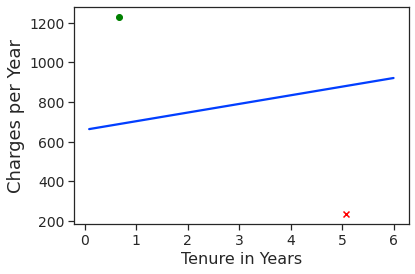

In [80]:
ax = sns.regplot(data = df, x = 'tenureinyears', y = 'yearly', scatter = False, ci = None)
ax.set_title('', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('Tenure in Years', fontsize=16)
ax.set_ylabel('Charges per Year', fontsize=18)
ax.tick_params(labelsize=14)
plt.xticks(range(0,7,1))
# plt.yticks(range(650,1000,50))

plt.scatter(x=cust1['tenureinyears'], y=cust1['yearly'], c='green', marker='o')
print('Distance for customer #1:', cust1['distance'])

plt.scatter(x=cust2['tenureinyears'], y=cust2['yearly'], c='red', marker='x')
print('Distance for customer #2:', cust2['distance'])

plt.show()

On the graph above, we plotted the two customers' data points. We can immediately see that customer one (green dot) is above the line of best fit, who is worth retending because the distance between data point and the line of best fit is positive. The distance calculated is the maximum amount of discount you can give this particular customer. On the other hand, customer two (red x-mark) falls below the line of best fit, which means that retending this customer is not profitable. The distance of the data point and the line of best fit is negative.

These data points might be from customers who have already churned, but in hindsight, we could have attempted to retend the customer by giving them a discount of a total of around +400 a year and still make profit from the customer.

# CONCLUSION

We were able to achieve our first objective which was to predict customers who are likely to churn by creating a machine learning model. We selected the most important features mainly based on the Boruta method, and in no particular order, these features are Dependents, Tenure, Internet Service, Online Security, TechSupport, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, and TotalCharges (PhoneService is optional). Random Forest classifier was eventually selected based on its preliminary accuracy, and a grid search cross-validation was run to tune its parameters, achieving pretty decent evaluation scores.

Our second objective to determine customer's value for retention program was also completed by graphing a line of best fit through data points of annual charges against tenure in years and then calculating the distance of the customer's data point and the line of best fit to find the maximum retention cost to still make profit.

## POSTSCRIPT

Hey! I hoped you enjoyed reading through my first ever data science project. Please be aware that this project was created by an aspiring data scientist (in other words a total newbie), so be sure to doubt all the explanations and methods you see here. I have yet to find the best practices, and I have yet to fully grasp all the concepts. If anything, your comment and feedback and critique will be much appreciated -- I'd be glad to learn from you!

Another thing I'd like to add is that I would very much love if there is a mentor out there who would take me under their wing (apprenticeship), so feel free to hit me up if you're interested :)